# Capstone Project - Car accident severity (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)


## Introduction: Business Problem <a name="introduction"></a>

   Every year the lives of approximately 1.35 million people are cut short as a result of a road traffic crash. Between 20 and 50 million more people suffer non-fatal injuries, with many incurring a disability as a result of their injury.

   Road traffic injuries cause considerable economic losses to individuals, their families, and to nations as a whole. These losses arise from the cost of treatment as well as lost productivity for those killed or disabled by their injuries, and for family members who need to take time off work or school to care for the injured. Road traffic crashes cost most countries 3% of their gross domestic product.

Predicting an accident and minimizing the frequency of accidents is an atmost requirement for any person or it may be for Health Care Organisations.
An accident and its sererity can be predicted based on several factor.
<ul>
    <li>Place of Accident(The place where the most accidents occur are more likely for encountering another accident).</li>
    <li>Type of Vehicle(Some Vehicles are more prone for accidents</li>
    <li>Road Condition</li>
    <li>Weather & etc</li>
</ul>

<em>Predicting an accident severity ahead for a road,helps a driver to take a detour or makes him drive carefully.</em>
    
    

### __Problem Statement__
Can we predict the severity of an accident based on the previous history of the accidents?


## Target Audience

- Self Driving Cars - A car on AutoPilot will inform the Driver about the likehood of an accident and how severe it can be.
- Navigation Systems - The optimal route maybe not the safest. Prediction helps to choose a route that is more safer and avoid accidents
- Government - It helps for better road constructions and Safety measures and establishing Hospitals near the places which are more likely for Accident occurance.

## Data <a name="data"></a>

The Dataset used for the analysis is provide by SDOT Traffic Management Division, Traffic Records Group, for Seattle.Is consists of all the recorded accident cases of 2004-2018.It also includes the severity of an accident.

The Dataset contains nearly 200000 row and 38 columns, it includes co-ordinates and type of accident and the severity of it.

Lets Look at the Dataset

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('Data-Collisions.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head(10)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


In [6]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

## Feature Engineering

The Dataset Set contains several features that do not contribute to the Prediction.
1.OBJECTID
2.INCKEY
3.COLDETKEY
4.REPORTNO
5.EXCEPTRSNCODE
6.EXCEPTRSNDESC
7.SEVERITYCODE.1(Redundant Column)
8.SEVERITYDESC
9.INCDATE
10.INCDTTM
11.JUNCTIONTYPE
12.SDOT_COLCODE
13.SDOT_COLDESC
14.INATTENTIONIND
15.PEDROWNOTGRNT
16.SDOTCOLNUM
17.SPEEDING
18.ST_COLCODE
19.ST_COLDESC
20.SEGLANEKEY
21.CROSSWALKKEY

most of the features not null or are unique identifiers

In [8]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

## Data Wrangling

lets drop all the unnecessary columns from the dataset

In [10]:
ll = ['OBJECTID','INCKEY','COLDETKEY','REPORTNO','EXCEPTRSNCODE',
      'STATUS','INTKEY','LOCATION','EXCEPTRSNDESC','INCDATE','INCDTTM','INATTENTIONIND','PEDROWNOTGRNT','SPEEDING','CROSSWALKKEY',
     'SEVERITYCODE.1','SEVERITYDESC','SDOTCOLNUM','SEGLANEKEY','ST_COLCODE', 'ST_COLDESC','SDOT_COLCODE',]

In [11]:
df.drop(columns=ll,axis=0,inplace=True)

In [12]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'SDOT_COLDESC',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR'],
      dtype='object')

Make sure all the features are of the appropriate Datatype

In [14]:
df.dtypes

SEVERITYCODE       int64
X                float64
Y                float64
ADDRTYPE          object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
JUNCTIONTYPE      object
SDOT_COLDESC      object
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
HITPARKEDCAR      object
dtype: object

In the colomn UNDERINFL contains Y,N,0,1
Make them uniform by assigning 0 to N and 1 to Y

In [15]:
df['UNDERINFL'].replace("0",'N',inplace=True)
df['UNDERINFL'].replace("1",'Y',inplace=True)

vc() displays all the categoriacal and value counts of distict values of all columns

In [17]:
col = df.columns.tolist()
col

['SEVERITYCODE',
 'X',
 'Y',
 'ADDRTYPE',
 'COLLISIONTYPE',
 'PERSONCOUNT',
 'PEDCOUNT',
 'PEDCYLCOUNT',
 'VEHCOUNT',
 'JUNCTIONTYPE',
 'SDOT_COLDESC',
 'UNDERINFL',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'HITPARKEDCAR']

In [35]:
def vc():
    for c in col:
        print(df[c].value_counts())
        print()

In [36]:
vc()

1    132221
2     57118
Name: SEVERITYCODE, dtype: int64

-122.332653    265
-122.344896    254
-122.328079    252
-122.344997    239
-122.299160    231
              ... 
-122.322768      1
-122.288680      1
-122.405699      1
-122.323578      1
-122.343898      1
Name: X, Length: 23563, dtype: int64

47.708655    265
47.717173    254
47.604161    252
47.725036    239
47.579673    231
            ... 
47.556705      1
47.709101      1
47.513899      1
47.565438      1
47.563521      1
Name: Y, Length: 23839, dtype: int64

Block           124591
Intersection     64748
Name: ADDRTYPE, dtype: int64

Parked Car    51138
Angles        34460
Rear Ended    32968
Other         22277
Sideswipe     18034
Left Turn     13624
Pedestrian     6551
Cycles         5378
Right Turn     2912
Head On        1997
Name: COLLISIONTYPE, dtype: int64

2     110986
3      34964
4      14435
1      12191
5       6473
0       5442
6       2659
7       1101
8        523
9        208
10       128
11        54
12 

In [25]:
df.isnull().sum()

SEVERITYCODE        0
X                5334
Y                5334
ADDRTYPE         1926
COLLISIONTYPE    4904
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
JUNCTIONTYPE     6329
SDOT_COLDESC        0
UNDERINFL        4884
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
HITPARKEDCAR        0
dtype: int64

Drop the null values of coordinates as we cannot approximate a location preciesly

In [29]:
df.dropna(subset=['X','Y'],inplace=True)

replace nan values of categorical values with mode

In [30]:
df['COLLISIONTYPE'].replace(np.nan,df['COLLISIONTYPE'].mode()[0],inplace=True)
df['JUNCTIONTYPE'].replace(np.nan,df['JUNCTIONTYPE'].mode()[0],inplace=True)
df['UNDERINFL'].replace(np.nan,df['UNDERINFL'].mode()[0],inplace=True)
df['WEATHER'].replace(np.nan,df['WEATHER'].mode()[0],inplace=True)
df['ROADCOND'].replace(np.nan,df['ROADCOND'].mode()[0],inplace=True)
df['LIGHTCOND'].replace(np.nan,df['LIGHTCOND'].mode()[0],inplace=True)

In [31]:
df.isnull().sum()

SEVERITYCODE     0
X                0
Y                0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
JUNCTIONTYPE     0
SDOT_COLDESC     0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
HITPARKEDCAR     0
dtype: int64

# Exploratory Data Analysis

Statistics of Numeriacal Data

In [32]:
df.describe()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
count,189339.000000,189339.000000,189339.000000,189339.000000,189339.000000,189339.000000,189339.000000
mean,1.301671,-122.330518,47.619543,2.452986,0.037863,0.028996,1.924136
std,0.458984,0.029976,0.056157,1.349092,0.200053,0.169143,0.629941
min,1.000000,-122.419091,47.495573,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-122.348673,47.575956,2.000000,0.000000,0.000000,2.000000
50%,1.000000,-122.330224,47.615369,2.000000,0.000000,0.000000,2.000000
75%,2.000000,-122.311937,47.663664,3.000000,0.000000,0.000000,2.000000
max,2.000000,-122.238949,47.734142,81.000000,6.000000,2.000000,12.000000


In [37]:
df.corr()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
SEVERITYCODE,1.000000,0.010309,0.017737,0.128866,0.246722,0.214969,-0.058067
X,0.010309,1.000000,-0.160262,0.012887,0.011304,-0.001752,-0.012168
Y,0.017737,-0.160262,1.000000,-0.013850,0.010178,0.026304,0.017058
PERSONCOUNT,0.128866,0.012887,-0.013850,1.000000,-0.024764,-0.040317,0.375640
PEDCOUNT,0.246722,0.011304,0.010178,-0.024764,1.000000,-0.017461,-0.265337
PEDCYLCOUNT,0.214969,-0.001752,0.026304,-0.040317,-0.017461,1.000000,-0.257882
VEHCOUNT,-0.058067,-0.012168,0.017058,0.375640,-0.265337,-0.257882,1.000000


In [38]:
%%capture
! pip install seaborn

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

(0, 2.066694260485651)

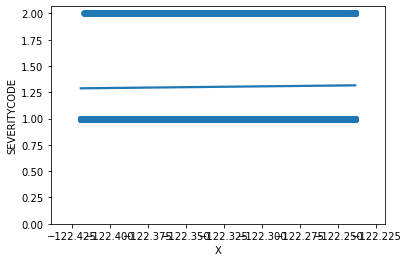

In [42]:
sns.regplot(x="X", y="SEVERITYCODE", data=df)
plt.ylim(0,)

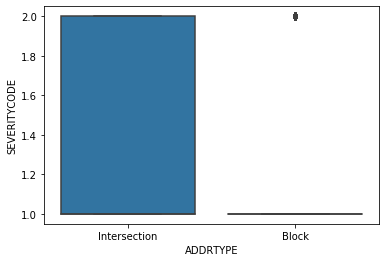

In [48]:
sns.boxplot(x="ADDRTYPE",y='SEVERITYCODE', data=df)

we see Most accidents occur at Intersection

## Methodology <a name="methodology"></a>

Since The Severity Code is either 1 or 2, the Logistic Regression is best suited for this problem,
Logistic Regression minimizes the Loss and error by iteratively training on the data
It is similar to Deep Learning

### One-hot Encoding

Converting all the categorical values by using pandas.get_dummies()

In [50]:
df2 =  pd.get_dummies(df[['UNDERINFL','ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','SDOT_COLDESC','WEATHER','ROADCOND','HITPARKEDCAR']])

In [51]:
df = pd.concat([df,df2],axis=1)

In [57]:
df = pd.concat([df,pd.get_dummies(df['LIGHTCOND'])],axis=1)

In [58]:
df

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,LIGHTCOND,UNDERINFL_N,UNDERINFL_Y,...,HITPARKEDCAR_Y,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
0,2,-122.323148,47.703140,2,0,0,2,Daylight,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,-122.347294,47.647172,2,0,0,2,Dark - Street Lights On,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,-122.334540,47.607871,4,0,0,3,Daylight,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1,-122.334803,47.604803,3,0,0,3,Daylight,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2,-122.306426,47.545739,2,0,0,2,Daylight,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,3,0,0,2,Daylight,1,0,...,0,0,0,0,0,0,1,0,0,0
194669,1,-122.344526,47.690924,2,0,0,2,Daylight,1,0,...,0,0,0,0,0,0,1,0,0,0
194670,2,-122.306689,47.683047,3,0,0,2,Daylight,1,0,...,0,0,0,0,0,0,1,0,0,0
194671,2,-122.355317,47.678734,2,0,1,1,Dusk,1,0,...,0,0,0,0,0,0,0,1,0,0


Drop all the Categorical Columns

In [53]:
df = df.drop(columns=['UNDERINFL','ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','SDOT_COLDESC','WEATHER','ROADCOND','HITPARKEDCAR'],axis=1)

In [59]:
df = df.drop(columns='LIGHTCOND',axis=1)

In [60]:
df

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL_N,UNDERINFL_Y,ADDRTYPE_Block,...,HITPARKEDCAR_Y,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
0,2,-122.323148,47.703140,2,0,0,2,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,-122.347294,47.647172,2,0,0,2,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,-122.334540,47.607871,4,0,0,3,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,-122.334803,47.604803,3,0,0,3,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,2,-122.306426,47.545739,2,0,0,2,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,3,0,0,2,1,0,1,...,0,0,0,0,0,0,1,0,0,0
194669,1,-122.344526,47.690924,2,0,0,2,1,0,1,...,0,0,0,0,0,0,1,0,0,0
194670,2,-122.306689,47.683047,3,0,0,2,1,0,0,...,0,0,0,0,0,0,1,0,0,0
194671,2,-122.355317,47.678734,2,0,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# Logistic Regression

## Train Test Split

In [62]:
X = df.drop(columns='SEVERITYCODE',axis=1)

In [64]:
y = df['SEVERITYCODE']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (151471, 97) (151471,)
Test set: (37868, 97) (37868,)


<h2 id="modeling">Modeling (Logistic Regression with Scikit-learn)</h2>

Lets build our model using __LogisticRegression__ from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models.
__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization. 
Now lets fit our model with train set:

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Now we can predict using our test set:

In [67]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [68]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.88383342, 0.11616658],
       [0.70033671, 0.29966329],
       [0.75345813, 0.24654187],
       ...,
       [0.98093502, 0.01906498],
       [0.74309952, 0.25690048],
       [0.73171236, 0.26828764]])

<h2 id="evaluation">Evaluation</h2>

### jaccard index
Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


In [69]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7532481250660188

### confusion matrix
Another way of looking at accuracy of classifier is to look at __confusion matrix__.

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,2]))

[[25130  1121]
 [ 8223  3394]]


Confusion matrix, without normalization
[[25130  1121]
 [ 8223  3394]]


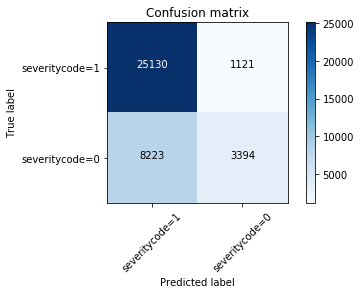

In [75]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['severitycode=1','severitycode=0'],normalize= False,  title='Confusion matrix')

In [76]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.75      0.96      0.84     26251
           2       0.75      0.29      0.42     11617

    accuracy                           0.75     37868
   macro avg       0.75      0.62      0.63     37868
weighted avg       0.75      0.75      0.71     37868



Based on the count of each section, we can calculate precision and recall of each label:


- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

    
So, we can calculate precision and recall of each class.

__F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.


And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.

### log loss
Now, lets try __log loss__ for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. 


In [77]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.4829863595955511

## Results and Discussion <a name="results"></a>

Most of the Features that determine are non linear and overlap on other features.
The Correlation between any two features is very less and combinely helps in predicting the Severity of an accident


The Accuracy of the model is 0.75


log loss of the model is 0.48

There is a high probabilty of accident on the Intersection

In [81]:
df['SEVERITYCODE'].value_counts()

1    132221
2     57118
Name: SEVERITYCODE, dtype: int64

The accident are mostly Property Damage

SEVERITYCODE Description
2—injury
1—prop damage

## Conclusion <a name="conclusion"></a>

In [ ]:
Although The predticion is moderate, the Data that is collected from the Car with e